In [1]:
import pandas as pd
import numpy as np
from TAPE.utils import counts2TPM, ProcessInputData
from TAPE.train import train_model, predict
import seaborn as sns
import matplotlib.pyplot as plt
from TAPE.simulation import generate_simulated_data
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.colors as colors
import anndata

Reading training data
Reading is done
Reading test data
Reading test data is done
Transforming to TPM
Variance Cutoff
Find intersected genes
Intersected gene number is  11695
Log2 & MinMax scale
Start training


100%|██████████| 128/128 [00:46<00:00,  2.75it/s]

Training is done
prediction loss is:


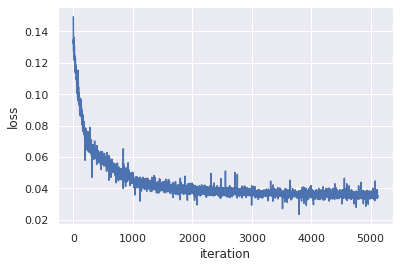

reconstruction loss is:


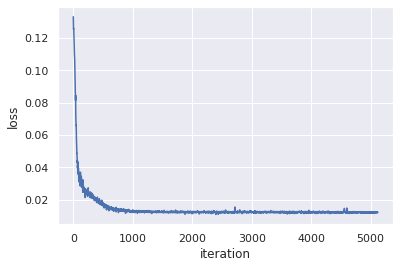

Model is saved without defined name
Start adaptive training for all the samples
Adaptive stage is done


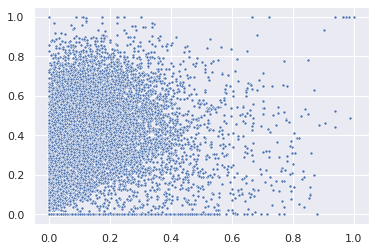

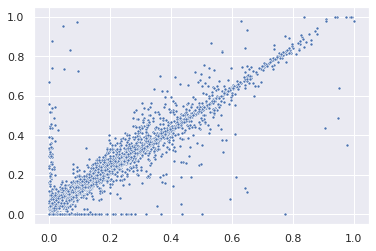

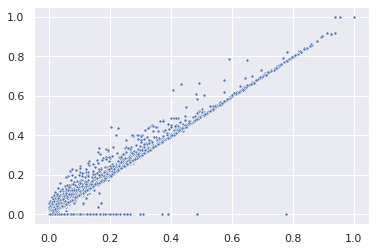

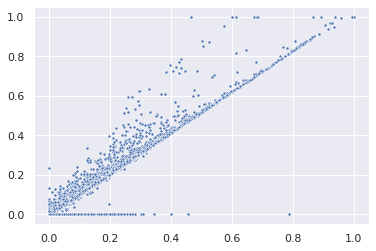

In [2]:
test_data = pd.read_csv('../TPMPBMC.txt',sep='\t',index_col=0)
data8k = pd.read_csv('Data/data8k_ref.txt',sep='\t',index_col=0)
data8k = counts2TPM(data8k,genelen='./Data/GeneLength.txt')
original_sigm = data8k.groupby('Celltype').mean()



original_sigm = np.log2(original_sigm+1)
train_x, train_y, test_x, genename, celltypes, samplename = \
        ProcessInputData('./data8k.h5ad', test_data.T, sep='\t', datatype='TPM', variance_threshold=0.5,
                         genelenfile='./Data/GeneLength.txt')
model = train_model(train_x,train_y,batch_size=128,iteration=5000)
train_sigm = model.sigmatrix().cpu().detach().numpy()
Sigm, Pred = \
    predict(test_x=test_x,genename=genename,celltypes=celltypes,samplename=samplename,
            model=model,
            adaptive=True,mode='overall')
train_sigm = pd.DataFrame(model.sigmatrix().cpu().detach().numpy(),columns=genename, index=celltypes)
inter = Sigm.columns.intersection(original_sigm.columns)
Sigm = Sigm[inter]
original_sigm = original_sigm[inter]
train_sigm = train_sigm[inter]
inter = Sigm.index.intersection(original_sigm.index)
Sigm = Sigm.loc[inter]
original_sigm = original_sigm.loc[inter]
train_sigm= train_sigm.loc[inter]
mms = MinMaxScaler()
Sigm = mms.fit_transform(Sigm.T).T
original_sigm = mms.fit_transform(original_sigm.T).T
train_sigm = mms.fit_transform(train_sigm.T).T

sns.scatterplot(original_sigm[5,:], Sigm[5,:],marker='.')
plt.show()
sns.scatterplot(original_sigm[4,:], Sigm[4,:],marker='.')
plt.show()
sns.scatterplot(original_sigm[1,:], Sigm[1,:],marker='.')
plt.show()
sns.scatterplot(original_sigm[0,:], Sigm[0,:],marker='.')
plt.show()

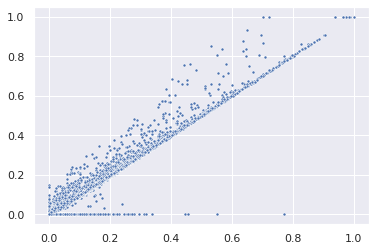

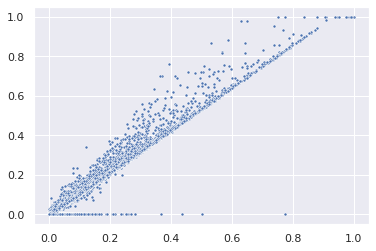

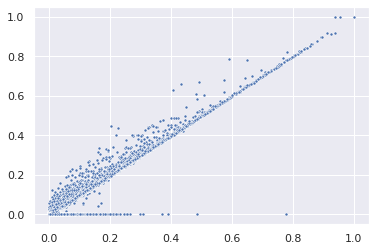

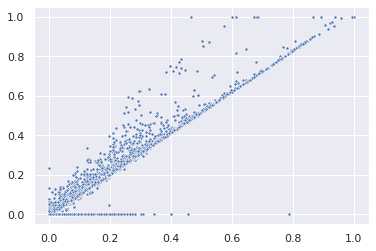

In [3]:
sns.scatterplot(original_sigm[5,:], train_sigm[5,:],marker='.')
plt.show()
sns.scatterplot(original_sigm[4,:], train_sigm[4,:],marker='.')
plt.show()
sns.scatterplot(original_sigm[1,:], train_sigm[1,:],marker='.')
plt.show()
sns.scatterplot(original_sigm[0,:], train_sigm[0,:],marker='.')
plt.show()

In [4]:
data10k = anndata.read_h5ad('./data10k.h5ad')
#display(data10k.obs)
data8k = anndata.read_h5ad('./data8k.h5ad')
#display(data8k.obs)
data6k = anndata.read_h5ad('./data6k.h5ad')
#display(data6k.obs)
traindata = anndata.concat([data10k, data8k, data6k])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [5]:
#../Results/PBMC/HIV_pbmc.csv
#F.l1_loss(cell_prop.sum(dim=1),torch.ones(cell_prop.shape[0]).to(device))

In [6]:
# train_x, train_y, test_x, genename, celltypes, samplename = \
#         ProcessInputData(traindata, './all_pbmc_tpm.csv', sep=',', datatype='TPM', variance_threshold=0.1)
# model = train_model(train_x,train_y,batch_size=128,iteration=5000)
# train_sigm = model.sigmatrix().cpu().detach().numpy()
# Sigm, Pred = \
#     predict(test_x=test_x,genename=genename,celltypes=celltypes,samplename=samplename,
#             model=model,
#             adaptive=True,mode='single')
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# for key, value in Sigm.items():
#     col = value.columns
#     index = value.index
#     value = value.values
#     value = mms.fit_transform(value.T).T
#     value = pd.DataFrame(value,columns=col,index=index)
#     value.T.to_csv('CrossVirus_'+key+'_sigmTPM.txt',sep='\t')

In [7]:
traindata

AnnData object with n_obs × n_vars = 15000 × 11426
    obs: 'Bcells', 'CD4Tcells', 'CD8Tcells', 'Dendritics', 'Monocytes', 'NK'

Reading training data
Reading is done
Reading test data
Reading test data is done
Variance Cutoff
Find intersected genes
Intersected gene number is  8985
Log2 & MinMax scale
Start training


100%|██████████| 42/42 [00:38<00:00,  1.10it/s]

Training is done
prediction loss is:


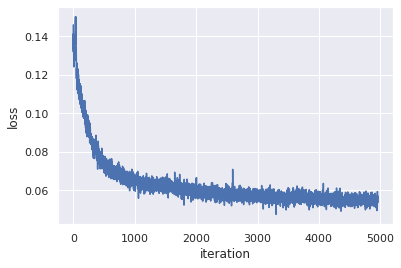

reconstruction loss is:


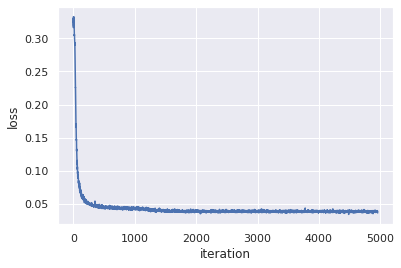

In [8]:
'./HIV_pbmc_tpm.csv'
'../Results/PBMC/HIV_pbmc.csv'
train_x, train_y, test_x, genename, celltypes, samplename = \
        ProcessInputData(traindata, './HIV_pbmc_tpm.csv', sep=',', datatype='tpm', variance_threshold=0.1,
                         genelenfile='./Data/GeneLength.txt')
model = train_model(train_x,train_y,batch_size=128,iteration=5000)
train_sigm = model.sigmatrix().cpu().detach().numpy()

In [9]:
Sigm, Pred = \
    predict(test_x=test_x,genename=genename,celltypes=celltypes,samplename=samplename,
            model=model,
            adaptive=True,mode='high-resolution')
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
for key, value in Sigm.items():
    col = value.columns
    index = value.index
    value = value.values
    #value = mms.fit_transform(value.T).T
    value = pd.DataFrame(value,columns=col,index=index)
    value.T.to_csv('HIV_'+key+'_sigm.txt',sep='\t')

Model is saved without defined name
Start adaptive training at high-resolution


100%|██████████| 92/92 [10:29<00:00,  6.85s/it]


Adaptive stage is done


In [10]:
Pred

,Bcells,CD4Tcells,CD8Tcells,Dendritics,Monocytes,NK
ADT0614R,0.069588,0.166634,0.056542,0.106770,0.359772,0.240693
ADT06JT1,0.100685,0.203104,0.071854,0.067289,0.352587,0.204480
ADT06P73,0.070826,0.202571,0.119446,0.055282,0.314731,0.237144
ADT08290,0.067045,0.227913,0.134000,0.030025,0.266775,0.274243
ADT0834L,0.060450,0.224114,0.076023,0.089207,0.377422,0.172785
...,...,...,...,...,...,...
KDT082GG,0.114929,0.205123,0.052001,0.069059,0.316606,0.242282
KDT082WK,0.056561,0.259545,0.153959,0.056933,0.267130,0.205872
KDT0V3JN,0.066354,0.221529,0.148304,0.039052,0.241272,0.283489
KDT0V77L,0.157094,0.144476,0.036774,0.104748,0.323057,0.233851
